In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/country_wise_latest.csv')

In [3]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [5]:
data.describe()

C:\Users\Fathima\Desktop\Me\Projects\COVID-19-Trend-Analysis\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [6]:
data.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [7]:
# checking for null values
data.isna().any().any()

np.False_

In [8]:
# checking for infinity values in the numeric data columns
numeric_data = data.select_dtypes(include=[np.number])
np.isinf(numeric_data).any().any()

np.True_

In [9]:
# replacing inifity with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# dropping columns with NaN values
data.dropna(inplace=True)

In [10]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.820000e+02,182.000000,1.820000e+02,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02,182.000000,182.000000
mean,8.933031e+04,3509.879121,5.202246e+04,3.379797e+04,1248.054945,29.615385,959.467033,2.972308,66.601319,40.558297,7.966686e+04,9663.450549,13.647912
std,3.884323e+05,14280.398555,1.926084e+05,2.161344e+05,5786.513060,121.614850,4252.395043,3.458736,24.307913,336.669357,3.427795e+05,48124.010700,24.791266
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,-47.000000,-3.840000
25%,1.107000e+03,18.250000,7.190000e+02,1.317500e+02,4.000000,0.000000,0.000000,0.942500,51.770000,1.442500,1.045250e+03,47.000000,2.762500
50%,4.970000e+03,103.500000,3.220000e+03,1.599000e+03,49.000000,1.000000,24.000000,2.130000,72.270000,3.580000,4.784000e+03,418.000000,6.890000
75%,3.967625e+04,718.250000,2.333350e+04,8.696000e+03,419.750000,5.750000,228.250000,3.715000,87.282500,6.232500,3.658350e+04,3248.500000,16.927500
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,3259.260000,3.834677e+06,455582.000000,226.320000


In [11]:
regional_data = data.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

In [12]:
regional_data.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242


In [13]:
sorted_data = regional_data.sort_values(by='Confirmed', ascending=False)

In [14]:
sorted_data.head()

,Country/Region,Confirmed,Deaths,Recovered
168,US,4290259,148011,1325804
23,Brazil,2442375,87618,1846641
78,India,1480073,33408,951166
136,Russia,816680,13334,602249
151,South Africa,452529,7067,274925


In [15]:
# to get the name of the top 10 countries with the most confirmed cases
top_10_countries = regional_data.sort_values(by='Confirmed', ascending=False).head(10)['Country/Region'].tolist()

In [16]:
top_10_countries

['US',
 'Brazil',
 'India',
 'Russia',
 'South Africa',
 'Mexico',
 'Peru',
 'Chile',
 'United Kingdom',
 'Iran']

In [29]:
# filtering so that only the top 10 countries with the most confirmed cases are used for comparison
filtered_data = regional_data[regional_data['Country/Region'].isin(top_10_countries)]


confirmed = filtered_data[['Country/Region', 'Confirmed']].copy()
confirmed['Metric'] = 'Confirmed'
confirmed = confirmed.rename(columns={'Confirmed': 'Count'})

deaths = filtered_data[['Country/Region', 'Deaths']].copy()
deaths['Metric'] = 'Deaths'
deaths = deaths.rename(columns={'Deaths': 'Count'})

recovered = filtered_data[['Country/Region', 'Recovered']].copy()
recovered['Metric'] = 'Recovered'
recovered = recovered.rename(columns={'Recovered': 'Count'})

melted_data = pd.concat([confirmed, deaths, recovered], ignore_index=True)


# The melt function is used to reshape the DataFrame from wide format to long format. This is useful for creating plots where each country has multiple bars
# melted_data = filtered_data.melt(id_vars= 'Country/Region',value_vars=['Confirmed', 'Deaths', 'Recovered'],var_name='Metric', value_name='Count')

In [30]:
# Sort the melted DataFrame by 'Count' in descending order
melted_data_sorted = melted_data.sort_values(by='Count', ascending=False)
melted_data_sorted.head(10)

,Country/Region,Count,Metric
8,US,4290259,Confirmed
0,Brazil,2442375,Confirmed
20,Brazil,1846641,Recovered
2,India,1480073,Confirmed
28,US,1325804,Recovered
22,India,951166,Recovered
6,Russia,816680,Confirmed
26,Russia,602249,Recovered
7,South Africa,452529,Confirmed
4,Mexico,395489,Confirmed


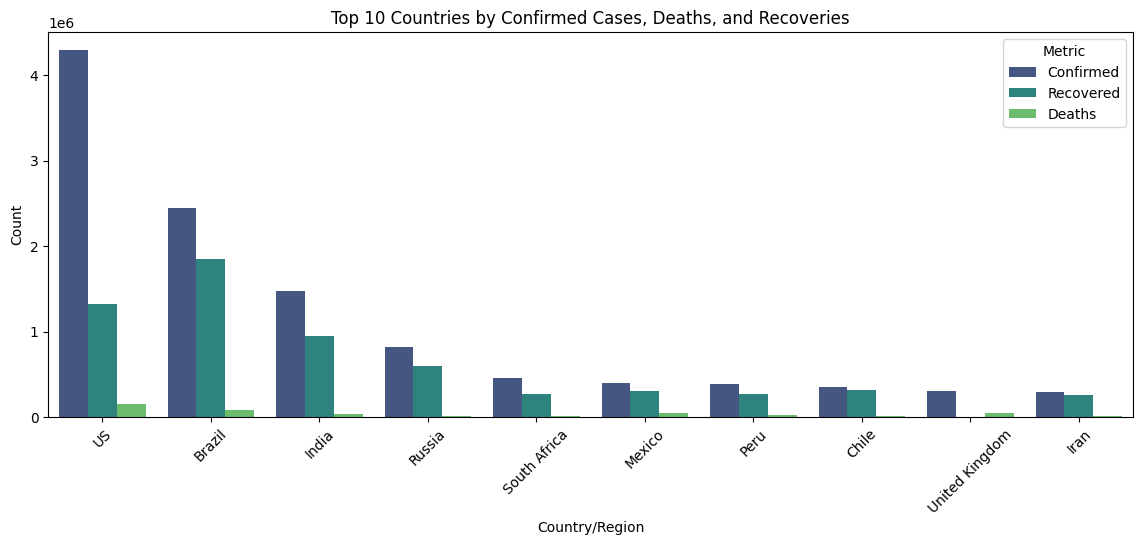

In [31]:
plt.figure(figsize=(14, 5))
sns.barplot(x='Country/Region', y='Count', hue='Metric', data=melted_data_sorted, palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases, Deaths, and Recoveries')
plt.xticks(rotation=45)
plt.show()

